In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gender_task = pd.read_csv('data/gender_task.csv')


In [7]:
gender_task['user_id'] = gender_task['user_id'].map(str)
gender_task['description_id'] = gender_task['description_id'].map(str)
gender_task['date'] = pd.to_datetime(gender_task['date'])

In [11]:
gender_task.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079933 entries, 0 to 2079932
Data columns (total 6 columns):
user_id           object
description_id    object
category          object
amount            float64
date              datetime64[ns]
gender            object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 95.2+ MB


In [12]:
gender_task.head()

,user_id,description_id,category,amount,date,gender
0,8287665566805798917,3660638023985833343,Restaurants,-1.53,2015-02-15,M
1,8287665566805798917,3660638023985833343,Restaurants,-1.53,2015-05-19,M
2,8287665566805798917,6383041573750908048,Cash & ATM,-455.39,2015-09-03,M
3,8287665566805798917,9183377839702642979,Music,-8.79,2015-03-07,M
4,8287665566805798917,2128558733007088311,Uncategorized,-52.82,2015-05-19,M


In [13]:
gender_task.describe(include='all')

,user_id,description_id,category,amount,date,gender
count,2079933,2079933,2067773,2.079933e+06,2079933,2079933
unique,1475,179435,108,NaN,307,2
top,4871693080905837887,9075968186325989747,Uncategorized,NaN,2015-06-01 00:00:00,M
freq,18234,61168,241519,NaN,14007,1353650
first,NaN,NaN,NaN,NaN,2015-01-01 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2015-11-03 00:00:00,NaN
mean,NaN,NaN,NaN,-5.207163e+00,NaN,NaN
std,NaN,NaN,NaN,7.388375e+03,NaN,NaN
min,NaN,NaN,NaN,-4.807600e+06,NaN,NaN
25%,NaN,NaN,NaN,-5.100000e+01,NaN,NaN


In [91]:
gender_task['dayofweek'] = gender_task.date.map(lambda x:x.dayofweek)

In [15]:
gender_task['gender'].value_counts()

M    1353650
F     726283
Name: gender, dtype: int64

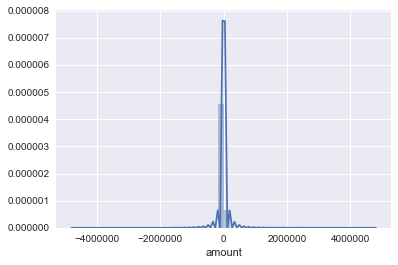

In [16]:
sns.distplot(gender_task['amount'])

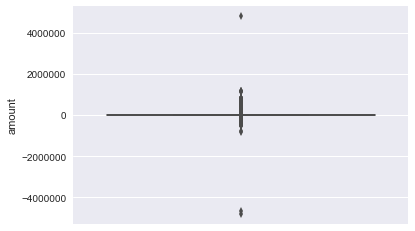

In [18]:
sns.boxplot(y='amount',data=gender_task)

In [19]:
gender_task.groupby('gender')['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,726283.0,-8.972179,3318.044765,-800215.91,-48.75,-15.53,-4.23,1134000.0
M,1353650.0,-3.187094,8830.043085,-4807600.00,-52.15,-16.15,-4.71,4807600.0


In [92]:
gender_task.groupby('gender')['dayofweek'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,726283.0,2.281754,1.884483,0.0,1.0,2.0,4.0,6.0
M,1353650.0,2.444382,1.928643,0.0,1.0,2.0,4.0,6.0


# pivot from transaction to user data

In [23]:
user_amount_median = gender_task.groupby('user_id')['amount'].median()
user_amount_min = gender_task.groupby('user_id')['amount'].min()
user_amount_max = gender_task.groupby('user_id')['amount'].max()

In [93]:
user_dow_mean = gender_task.groupby('user_id')['dayofweek'].mean()

In [94]:
user_amount_min.name='min'
user_amount_median.name='median'
user_amount_max.name='max'
user_dow_mean.name='dow'


In [29]:
user_gr = gender_task.groupby('user_id')

In [40]:
ll = []
for u,gr in user_gr:
    vc = gr['category'].value_counts()
    maxc = None
    if len(vc)>0:
        maxc = vc.idxmax()
    ll.append({'user_id':u,'max_cat':maxc})
user_cat = DataFrame(ll)
user_cat.index = user_cat['user_id']
user_cat = user_cat.drop('user_id',axis=1)

In [61]:
ll = []
for u,gr in user_gr:
    vc = gr['gender'].value_counts()
    maxc = None
    if len(vc)>0:
        maxc = vc.idxmax()
    ll.append({'user_id':u,'gender':maxc})
user_gen = DataFrame(ll)
user_gen.index = user_gen['user_id']
user_gen = user_gen.drop('user_id',axis=1)

In [95]:
df = pd.concat([user_amount_max.to_frame(),user_amount_min.to_frame(),user_amount_median.to_frame(),user_dow_mean.to_frame(),user_cat,user_gen],axis=1)
df.head()

,max,min,median,dow,max_cat,gender
user_id,,,,,,
1006666640984951378,11271.39,-9460.00,-23.670,1.847007,Transfer,F
1009302328699422906,3427.12,-3427.12,-17.400,3.513917,Groceries,M
1013919850183888608,20115.78,-10800.00,-30.205,2.752018,Uncategorized,M
1014226823806502806,10945.77,-4900.00,-9.980,1.704776,Transfer,F
1021946908801156887,108158.59,-13626.53,-24.500,2.745019,Uncategorized,M


In [96]:
df.to_csv('intuit/gender_task_flat1.csv')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1475 entries, 1006666640984951378 to 999948330882583884
Data columns (total 6 columns):
max        1475 non-null float64
min        1475 non-null float64
median     1475 non-null float64
dow        1475 non-null float64
max_cat    1474 non-null object
gender     1475 non-null object
dtypes: float64(4), object(2)
memory usage: 120.7+ KB


In [115]:
# relation gender to max_cat

pd.crosstab(df.max_cat,df.gender,normalize='index')#normalize='index



# for cat in categorical_feature:
#     print(pd.crosstab(open_email_table[cat],open_email_table.clicked,normalize='index'))
#     sns.countplot(x=cat, hue="clicked", data=open_email_table,)
#     plt.show()

gender,F,M
max_cat,,
Air Travel,1.000000,0.000000
Bank Fee,0.800000,0.200000
Business Services,0.800000,0.200000
Cash & ATM,0.363636,0.636364
Check,0.000000,1.000000
Clothing,1.000000,0.000000
Coffee Shops,0.529412,0.470588
Credit Card Payment,0.500000,0.500000
Doctor,0.500000,0.500000


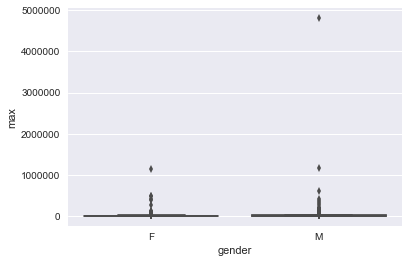

In [68]:
sns.boxplot(x='gender',y='max',data=df)


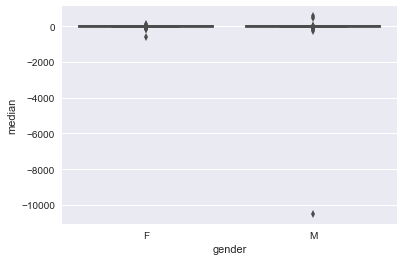

In [69]:
sns.boxplot(x='gender',y='median',data=df)


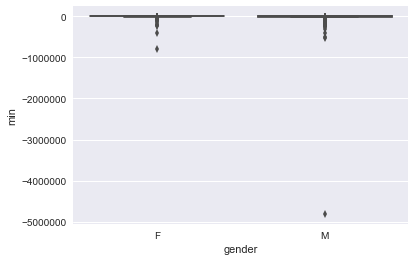

In [70]:
sns.boxplot(x='gender',y='min',data=df)


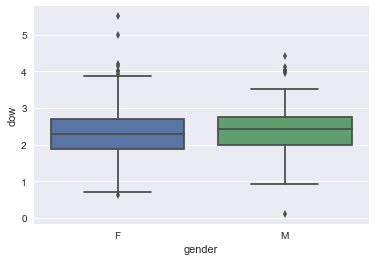

In [98]:
sns.boxplot(x='gender',y='dow',data=df)


# classification 

In [71]:
df.columns

Index(['max', 'min', 'median', 'max_cat', 'gender'], dtype='object')

In [105]:
df['target'] = df.gender.map(lambda x:1 if x=='F' else 0)

In [106]:
df['target'].mean()

0.4406779661016949

In [107]:
df_dummy = pd.get_dummies(df)

In [108]:
df_dummy.columns

Index(['max', 'min', 'median', 'dow', 'target', 'max_cat_Air Travel',
       'max_cat_Bank Fee', 'max_cat_Business Services', 'max_cat_Cash & ATM',
       'max_cat_Check', 'max_cat_Clothing', 'max_cat_Coffee Shops',
       'max_cat_Credit Card Payment', 'max_cat_Doctor',
       'max_cat_Electronics & Software', 'max_cat_Entertainment',
       'max_cat_Fast Food', 'max_cat_Fees & Charges', 'max_cat_Finance Charge',
       'max_cat_Financial', 'max_cat_Food & Dining', 'max_cat_Gas & Fuel',
       'max_cat_Groceries', 'max_cat_Hair', 'max_cat_Health & Fitness',
       'max_cat_Home Improvement', 'max_cat_Home Services', 'max_cat_Income',
       'max_cat_Interest Income', 'max_cat_Investments',
       'max_cat_Movies & DVDs', 'max_cat_Music', 'max_cat_Parking',
       'max_cat_Paycheck', 'max_cat_Pharmacy', 'max_cat_Public Transportation',
       'max_cat_Rental Car & Taxi', 'max_cat_Restaurants',
       'max_cat_Service & Parts', 'max_cat_Shopping', 'max_cat_State Tax',
       'max_cat_Te

In [109]:
features = ['max', 'min', 'median','dow', 'max_cat_Air Travel',
       'max_cat_Bank Fee', 'max_cat_Business Services', 'max_cat_Cash & ATM',
       'max_cat_Check', 'max_cat_Clothing', 'max_cat_Coffee Shops',
       'max_cat_Credit Card Payment', 'max_cat_Doctor',
       'max_cat_Electronics & Software', 'max_cat_Entertainment',
       'max_cat_Fast Food', 'max_cat_Fees & Charges', 'max_cat_Finance Charge',
       'max_cat_Financial', 'max_cat_Food & Dining', 'max_cat_Gas & Fuel',
       'max_cat_Groceries', 'max_cat_Hair', 'max_cat_Health & Fitness',
       'max_cat_Home Improvement', 'max_cat_Home Services', 'max_cat_Income',
       'max_cat_Interest Income', 'max_cat_Investments',
       'max_cat_Movies & DVDs', 'max_cat_Music', 'max_cat_Parking',
       'max_cat_Paycheck', 'max_cat_Pharmacy', 'max_cat_Public Transportation',
       'max_cat_Rental Car & Taxi', 'max_cat_Restaurants',
       'max_cat_Service & Parts', 'max_cat_Shopping', 'max_cat_State Tax',
       'max_cat_Television', 'max_cat_Transfer', 'max_cat_Uncategorized',
       'max_cat_Utilities' ]
target = 'target'

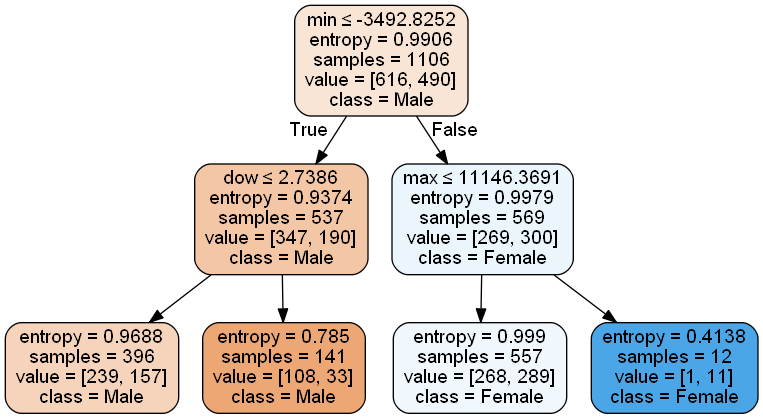

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(df_dummy[features], df_dummy[target], random_state=0)


estimator = DecisionTreeClassifier(criterion = 'entropy',max_depth=2, random_state=0,class_weight='b')
estimator.fit(X_train, y_train)


tree.export_graphviz(estimator, out_file="dotfile.txt",feature_names =X_train.columns )


import pydotplus
from IPython.display import Image


with open('dotfile.txt', 'w') as out:
    content = tree.export_graphviz(estimator,out_file=None,feature_names =X_train.columns ,class_names=['Male','Female'], 
                     filled=True, rounded=True, special_characters=True)
    graph=pydotplus.graph_from_dot_data(content)

Image(graph.create_png())

# feature importance

In [112]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

importances

array([ 0.2254186 ,  0.23229753,  0.21889066,  0.24313862,  0.0011695 ,
        0.00221241,  0.00123332,  0.00183764,  0.00622   ,  0.00681217,
        0.00211544,  0.00297174,  0.        ,  0.00143336,  0.00097756,
        0.00436534,  0.00086243,  0.00134614,  0.00084932,  0.00136514,
        0.00213827,  0.00364216,  0.00109373,  0.00081506,  0.0006667 ,
        0.00071111,  0.00242347,  0.00241085,  0.        ,  0.00138174,
        0.00176376,  0.00180228,  0.00195186,  0.00110543,  0.        ,
        0.00191321,  0.00448469,  0.00060705,  0.00392186,  0.00086675,
        0.00109419,  0.00547142,  0.00352569,  0.00069178])

In [114]:
DataFrame({'feature':X_train.columns,'importance':importances}).sort_values(by='importance',ascending=False)

,feature,importance
3,dow,0.243139
1,min,0.232298
0,max,0.225419
2,median,0.218891
9,max_cat_Clothing,0.006812
8,max_cat_Check,0.006220
41,max_cat_Transfer,0.005471
36,max_cat_Restaurants,0.004485
15,max_cat_Fast Food,0.004365
38,max_cat_Shopping,0.003922
